## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmc import HMC
from scipy.signal import correlate
from matplotlib import cm
from matplotlib.patches import Ellipse
from matplotlib.lines import Line2D

## Auxiliarry function for plotting

In [2]:
def cov_ellipse(mean, cov, ax, N=4, data='truth'):
    """
    Function defined to plot the confidence ellipsoids
    """ 

    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    v_x, v_y = eigvecs[:, 0][0], eigvecs[:, 0][1]
    alpha = np.arctan2(v_y , v_x)
    width, height = 2 * np.sqrt(eigvals)

    if data == 'truth':
        for i in range(N):
            ax.add_patch(Ellipse(mean, i * width, i * height, lw=1, angle=np.degrees(alpha),
                             ec='g', fc='none', linestyle='-'))
    elif data == 'simulated':
        for i in range(N):
            ax.add_patch(Ellipse(mean.T, i * width, i * height, lw=1, angle=np.degrees(alpha),
                             ec='brown', fc='none', linestyle='-'))

    elif data == 'start':
        for i in range(N):
            ax.add_patch(Ellipse(mean.T, i * width, i * height, lw=1, angle=np.degrees(alpha),
                             ec='green', fc='none', linestyle='-'))

## Test HMC algorithm on

$$
\pi = \mathcal{N}(\textbf{5, $\Sigma$})
$$
where
$$
\Sigma = \begin{pmatrix} 0.2 & 0 \\ 0 & 0.8
\end{pmatrix}
$$

In [4]:
# Builds it
hmc = HMC()

dim = 2
random_seed = 30
rs = np.random.RandomState(random_seed)

# Parameters of target density
sigma = np.eye(dim)
mean = 5 * np.ones((dim, 1))

sigma[0, 0] = 0.2
sigma[1, 1] = 0.8

# Paramters of auxiliary rv
p_mean = np.zeros((dim, 1))
M = np.eye(dim)

# Intialization
x_0 = np.zeros((dim, 1))

val, warm = hmc.sample_multivariate(x_0, p_mean, M, mean, sigma, 10000, step=20, eps= 0.01, random_state=rs, warm_start=5000)




## Plots the results

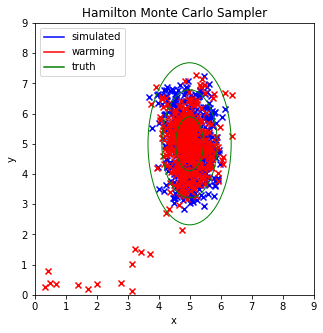

In [5]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
m =  list(mean[:, 0])


for i in range(len(val)):
    if i % 5 == 0:
        ax.scatter(val[i][0, 0], val[i][1, 0], color='b', marker='x')

for i in range(len(warm)):
    if i % 5 == 0:
        ax.scatter(warm[i][0, 0], warm[i][1, 0], color='r', marker='x')

plt.xlim(0, 9)
plt.ylim(0, 9)
cov_ellipse(m, sigma, ax, data='truth')


ax.set_title(r'Hamilton Monte Carlo Sampler')
ax.set_xlabel(r'x')
ax.set_ylabel(r'y')
colors = ['blue', 'red', 'green']
lines = [Line2D([0], [0], color=c) for c in colors]
labels = ['simulated', 'warming', 'truth']
plt.legend(lines, labels)

## Test acceptance Ratio


In [7]:
acc_rat = []
dimensions = []
for i in range(1, 50, 5):
    dim = i
    dimensions.append(dim)
    
    iterations = 10000
    warm_start = 5000

    sigma = np.eye(dim)
    mean = 5 * np.ones((dim, 1))

    p_mean = np.zeros((dim, 1))
    M = np.eye(dim)
 
    print(dim)
    x_0 = np.zeros((dim, 1))


    hmc = HMC()

    val, warm = hmc.sample_multivariate(x_0, p_mean, M, mean, sigma, 10000, step=20, eps=0.01, random_state=rs, warm_start=5000)

    acc_rat.append(len(val) / (iterations - warm_start))

1
6
11
16
21
26
31
36
41
46


## Plot the acceptance ratio

Text(0, 0.5, 'Acceptation ratio ($\\alpha$)')

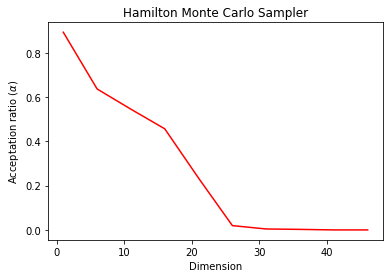

In [8]:
plt.plot(dimensions, acc_rat, color='r')
plt.title(r'Hamilton Monte Carlo Sampler')
plt.xlabel(r'Dimension')
plt.ylabel(r'Acceptation ratio ($\alpha$)')

## Autocorrelation ($D=20$)

In [14]:
dim = 20

sigma = np.eye(dim)
mean = 5 * np.ones((dim, 1))

p_mean = np.zeros((dim, 1))
M = np.eye(dim)

x_0 = np.zeros((dim, 1))

hmc = HMC()

val, warm = hmc.sample_multivariate(x_0, p_mean, M, mean, sigma, 10000, step=20, eps=0.01, random_state=rs, warm_start=5000)


## Plot autocorrelation

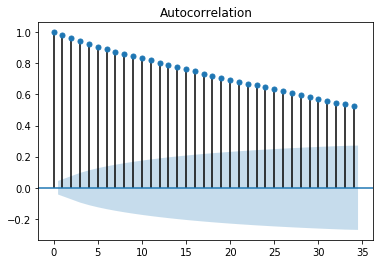

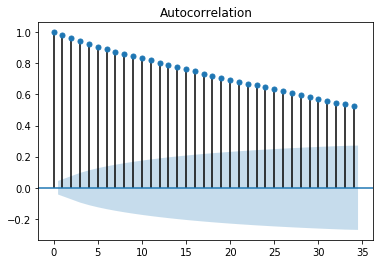

In [16]:
from statsmodels.graphics.tsaplots import plot_acf
values = np.array(val)
plot_acf(values[:, 0])